In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from astropy.io import fits
from scipy.optimize import curve_fit

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
# read the SNe data in
file = 'data/J_ApJ_716_712_tableb2.dat'


df = pd.read_table(file, delimiter='|', skiprows=7, header=None,
                   names=['SNe', 'S2N', 'Z', 'Bmag', 'Bmag_e', 'x1', 'x1_e', 'c', 'c_e', 'mu', 'mu_e', 'ref', 'fail'])

df

,SNe,S2N,Z,Bmag,Bmag_e,x1,x1_e,c,c_e,mu,mu_e,ref,fail
0,1993ah,NaN,0.0285,16.86,0.19,-2.26,0.93,0.23,0.09,34.61,0.23,1,NaN
1,1993ag,NaN,0.0500,17.79,0.05,-1.09,0.24,0.12,0.02,35.95,0.17,1,NaN
2,1993o,NaN,0.0529,17.60,0.05,-1.03,0.14,-0.01,0.02,36.09,0.16,1,NaN
3,1993b,NaN,0.0701,18.43,0.04,-0.53,0.21,0.09,0.02,36.71,0.16,1,NaN
4,1992bs,NaN,0.0627,18.25,0.05,-0.27,0.23,0.02,0.02,36.75,0.16,1,NaN
5,1992br,NaN,0.0876,19.19,0.11,-2.97,0.38,-0.04,0.07,37.50,0.19,1,NaN
6,1992bp,NaN,0.0786,18.27,0.04,-1.27,0.20,-0.02,0.02,36.76,0.16,1,NaN
7,1992bo,NaN,0.0172,15.75,0.13,-2.68,0.18,0.03,0.02,33.93,0.20,1,NaN
8,1992bl,NaN,0.0422,17.30,0.08,-1.95,0.24,0.02,0.04,35.61,0.17,1,NaN
9,1992bh,NaN,0.0453,17.58,0.05,-0.02,0.25,0.10,0.02,35.91,0.17,1,NaN


### Plot the redshift (Z) vs the distance modulus (mu)
This a classic figure for Supernova Cosmology!

(Put redshift on the X axis)

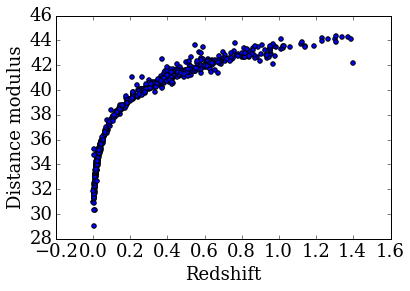

In [12]:
plt.scatter(df['Z'],df['mu'])
plt.xlabel('Redshift')
plt.ylabel('Distance modulus')
plt.figure()

# Polynomial Fits

Let's try to fit the data using a simple polynomial fit function, built in to numpy...

**Experiment with different fit orders**

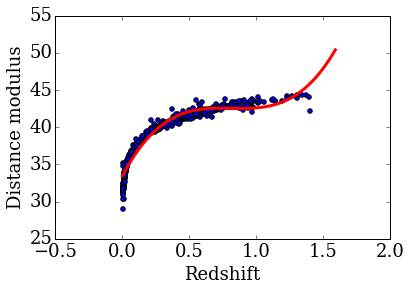

In [39]:
ok = np.isfinite(df['mu']) # you'll want to make this cut to get rid of missing data!

DEG = 3 # this is the order of polynomial you want to fit
fit = np.polyfit(df['Z'][ok], df['mu'][ok], DEG)

plt.scatter(df['Z'][ok], df['mu'][ok]) # plot the data again (as above)

# now plot the FIT to the data...
plt.plot(np.arange(0,1.6,0.01), np.polyval(fit, np.arange(0,1.6,0.01)), 
         color='red', lw=3)
plt.xlabel('Redshift')
plt.ylabel('Distance modulus')



# Powerlaw Fit

It turns out we happen to know a bit about the physics of what we're looking at... so let's use that to make a smarter fit! In this case, the Y-axis (distance modulus) is in magnitudes, a logarithmic unit. Let's convert the X-axis to a log scaling and fit a straight line.

Note: this isn't *exactly* the same as fitting a true powerlaw to the data, but it's a good illustration. 
We're going to cheat a bit and fit the $\log_{10}(Z)$ space with a line


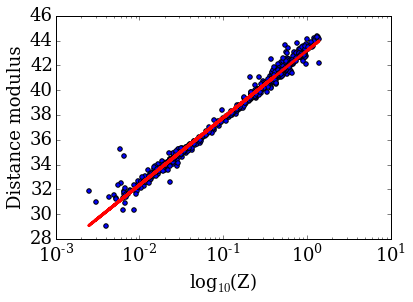

In [69]:
fit2 = np.polyfit(np.log10(df['Z'][ok]), df['mu'][ok], 1)

plt.scatter(df['Z'][ok], df['mu'][ok]) # plot the data again (as above)

# now plot the FIT to the data...
plt.plot(df['Z'][ok], np.polyval(fit2, np.log10(df['Z'][ok])), 
         color='red', lw=3)
plt.xlabel('log$_{10}$(Z)')
plt.xscale('log')
plt.xlim(1e-3,1e1)
plt.ylabel('Distance modulus')



# Compare Fits

- Calculate the $\chi^2$ for the fits
    - BIC = $\chi^2 + k$ $ln(n)$, where $k$ is the # of degrees of freedom in the model, $n$ the # of data points
    - https://en.wikipedia.org/wiki/Bayesian_information_criterion
- $\chi^2 = 1/n$ $\Sigma$ ((data - model) / errors)$^2$
- Compare with the BIC
- Which model is the "best"?
- the error on the distance modulus is the "mu_e" column of data

In [93]:
chi_poly = (1/np.size(df['Z'][ok]))*np.sum((df['mu'][ok] - np.polyval(fit, df['Z'][ok]))/df['mu_e'])**2

chi_pow = (1/np.size(df['Z'][ok]))*np.sum((df['mu'][ok] - np.polyval(fit2, np.log10(df['Z'][ok])))/df['mu_e'])**2

BIC_poly = chi_poly + 2*np.log(np.size(df['Z'][ok]))
BIC_pow = chi_pow + 1*np.log(np.size(df['Z'][ok]))

BIC_poly
BIC_pow


38.495729709985277

# Fit a Gaussian

Now let's branch out and fit another function. Today we'll keep it simple and just fit a simple Gaussian curve. BUT, you could do this approach to fit ANY function you can write down.

In [81]:
# STEP 1: make a method that produces a function

def gaus(x, a, b, x0, sigma):
    """
    Simple Gaussian function

    Parameters
    ----------
    x : float or 1-d numpy array
        The data to evaluate the Gaussian over
    a : float
        the amplitude
    b : float
        the constant offset
    x0 : float
        the center of the Gaussian
    sigma : float
        the width of the Gaussian

    Returns
    -------
    Array or float of same type as input (x).
    """
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + b


### This data is from the Sloan Digital Sky Survey. 

We're going to read in the spectrum of a Quasar and determine it's redshift!

To do this, we'll fit an emission line with a gaussian to measure the wavelength center (x0 in the function above)

In [82]:
# read the data in, just like last week...
dfile = 'data/spec-3819-55540-0186.fits'

hdulist = fits.open(dfile)
tbl = hdulist[1].data
hdr = hdulist[0].header
# tbl.columns
flux = tbl['flux']

### note the Flux is given, but NOT the wavelength... hmmm

In [83]:
# SDSS spectra have many parameters in their "header" that define the properties of the spectrum.
# We'll use 2 of these to figure out the wavelength!
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
FLAVOR  = 'science '           / exposure type, SDSS spectro style              
BOSSVER = 'r       '           / ICC version                                    
MJD     =                55540 / APO fMJD day at start of exposure              
MJDLIST = '55540   '           /                                                
NAME    = '3819-55540-01'      / The name of the currently loaded plate         
PLATEID =                 3819 / The currently loaded plate                     
TILEID  =                10182 /Cartridge used in this plugging                 
CARTID  =                   

In [85]:
# here is how you create the "log-linear" wavelength data using these header keywords
wave = 10. ** (np.arange(0,len(flux)) * hdr['COEFF1'] + hdr['COEFF0'])

# this may be useful to you someday!! Remember it

### Plot the spectrum...

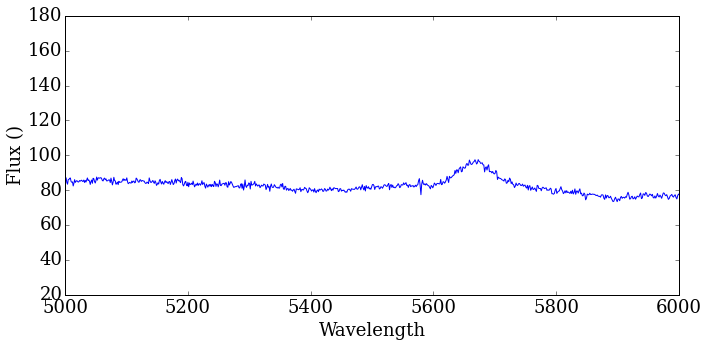

In [89]:
plt.figure(figsize=(11,5))
plt.plot(wave,flux)
plt.xlim(5000,6000)
plt.xlabel('Wavelength')
plt.ylabel('Flux ()')

### Now fit the gaussian using SciPy's Curve_Fit method

There are 2 good tricks to doing this:

1. Give the function a reasonable initial guess (p0 below)
2. only fit the data with a small range of the emission line you care about

5667.6390424007177

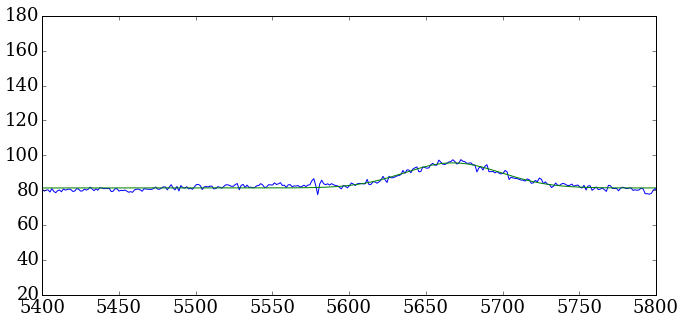

In [101]:
p0 = (20,85,5675,50) # LOOK at the data above for this gaussian peak, put in good guesses!

# pick some limits within a few times the width of the peak, so to avoid (trying to) 
# fit the WHOLE spectrum with a single gaussian
WMIN = 5400
WMAX = 5800

x = np.where((wave > WMIN) & (wave < WMAX))
fit, cov = curve_fit(gaus, wave[x], flux[x], p0=p0)

plt.figure(figsize=(11,5))
plt.plot(wave, flux)
plt.xlim(5400,5800)
plt.plot(wave, gaus(wave, *fit)) # this *fit is a trick to explode all the parameters of "fit" in to "gauss"

obs = fit[2]
obs


# Compute the Redshift

Recall: 

$1 + z = \lambda_{obs} / \lambda_{rest}$

This is a Mg II line, with $\lambda_{rest} = 2800.3$ Angstroms 

In [103]:
z = (obs/2800.3) - 1
z

1.0239399501484545